In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

df_arac = pd.read_csv(u'../data/arac.csv',sep=';')

In [48]:
df_arac

,Year,All,Car,Minibus,Bus,SmallTruck,Truck,Motorcycle,SpecialVehicles,Machinery,Tractor
0,1966,231977,91469,10913,12041,31462,47931,32099,3610,2452,NaN
1,1967,284194,112367,16008,13332,39927,56889,39647,3641,2383,NaN
2,1968,318768,125375,18967,13948,43441,62616,47062,4033,3326,NaN
3,1969,354398,137345,20540,15529,48655,69478,52959,4568,5324,NaN
4,1970,369808,137771,20916,15980,52152,70730,60994,5070,6195,NaN
5,1971,403880,153676,22380,17140,57011,73433,68417,5349,6474,NaN
6,1972,460087,187272,25559,18504,62796,78920,74402,5747,6887,NaN
7,1973,543318,240360,30055,20011,71043,86780,80860,6420,7789,NaN
8,1974,647947,313160,34122,21404,81025,95309,86028,7338,9561,NaN
9,1975,785920,403546,40623,23763,98579,108381,91421,8450,11157,NaN


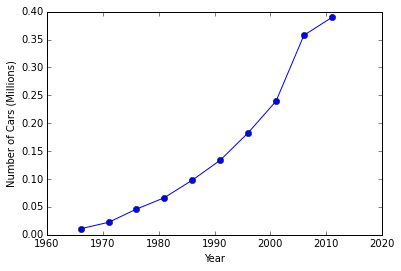

In [59]:
BaseYear = 1966
x = np.matrix(df_arac.Year[0:-1:5]).T-BaseYear
#y = np.matrix(df_arac.Car[0:]).T/1000000.0
y = np.matrix(df_arac.Minibus[0:-1:5]).T/1000000.0

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Year')
plt.ylabel('Number of Cars (Millions)')

plt.show()

In [13]:
df_arac.Year[0:]

0     1966
1     1967
2     1968
3     1969
4     1970
5     1971
6     1972
7     1973
8     1974
9     1975
10    1976
11    1977
12    1978
13    1979
14    1980
15    1981
16    1982
17    1983
18    1984
19    1985
20    1986
21    1987
22    1988
23    1989
24    1990
25    1991
26    1992
27    1993
28    1994
29    1995
30    1996
31    1997
32    1998
33    1999
34    2000
35    2001
36    2002
37    2003
38    2004
39    2005
40    2006
41    2007
42    2008
43    2009
44    2010
45    2011
46    2012
47    2013
48    2014
49    2015
Name: Year, dtype: int64

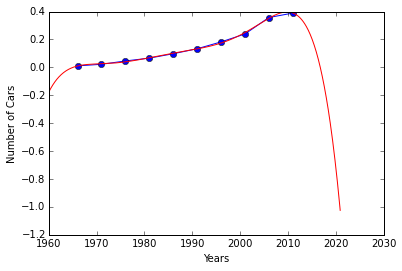

In [62]:
# Setup the vandermonde matrix
N = len(x)
degree = 6
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
A = np.hstack((np.power(x,i) for i in range(degree+1)))

# Solve the least squares problem
w_ls,E,rank,sigma = np.linalg.lstsq(A, y)

#w_ls = (A.T*A).I*A.T*y

plt.plot(x+BaseYear, y, 'o-')
plt.xlabel('Years')
plt.ylabel('Number of Cars')


# Prediction
#TargetYear = np.matrix([2017, 2018, 2019])
TargetYear = np.arange(1960,2021,1/12.0)
x_test = np.matrix(TargetYear - BaseYear).T
A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

f = A2*w_ls

plt.plot(x_test+BaseYear, f, 'r-')




plt.show()


In [29]:
np.vstack((np.hstack([1,1]), np.hstack([3,2])))


s = [(i,i*i,i*i*i) for i in range(3)]
s

[(0, 0, 0), (1, 1, 1), (2, 4, 8)]

In [43]:
A = np.hstack((np.power(x[0:4],i) for i in range(degree+1)))

A2 = np.hstack((np.power(x_test,i) for i in range(degree+1)))

A2*w_ls

matrix([[ 13.17080038]])